In [153]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from decimal import *


In [154]:
df = pd.read_csv('/Users/marina/Downloads/car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [156]:
# saledate по месяцам и годам, выручка за каждый месяц 
# make + model + year, выбрать топ 5 самых популярных 
# топ селлеров, их % в тотальной выручке 

In [157]:
df.isnull().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [158]:
df.dropna(subset = 'saledate', inplace=True)

In [159]:
df['new_date'] = pd.to_datetime(df['saledate'].str.replace(' UTC', ''), errors='coerce')

/var/folders/th/prg8z3510zg7034rx9vyrvjm0000gn/T/ipykernel_1435/2620413964.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['new_date'] = pd.to_datetime(df['saledate'].str.replace(' UTC', ''), errors='coerce')
/var/folders/th/prg8z3510zg7034rx9vyrvjm0000gn/T/ipykernel_1435/2620413964.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['new_date'] = pd.to_datetime(df['saledate'].str.replace(' UTC', ''), errors='coerce')


In [160]:
df['year_month'] = pd.to_datetime( df['new_date'], utc = True).dt.strftime('%Y-%m')

In [161]:
monthly_revenue = df.groupby('year_month')['sellingprice'].sum().reset_index()
monthly_revenue

,year_month,sellingprice
0,2014-01,3.204525e+06
1,2014-02,1.050000e+04
2,2014-12,6.044342e+08
3,2015-01,1.868476e+09
4,2015-02,2.218852e+09
5,2015-03,6.228744e+08
6,2015-04,1.459504e+07
7,2015-05,7.596618e+08
8,2015-06,1.492472e+09
9,2015-07,2.143081e+07


In [162]:
monthly_revenue['sellingprice'] = monthly_revenue['sellingprice'].apply(lambda x: x//1000000)

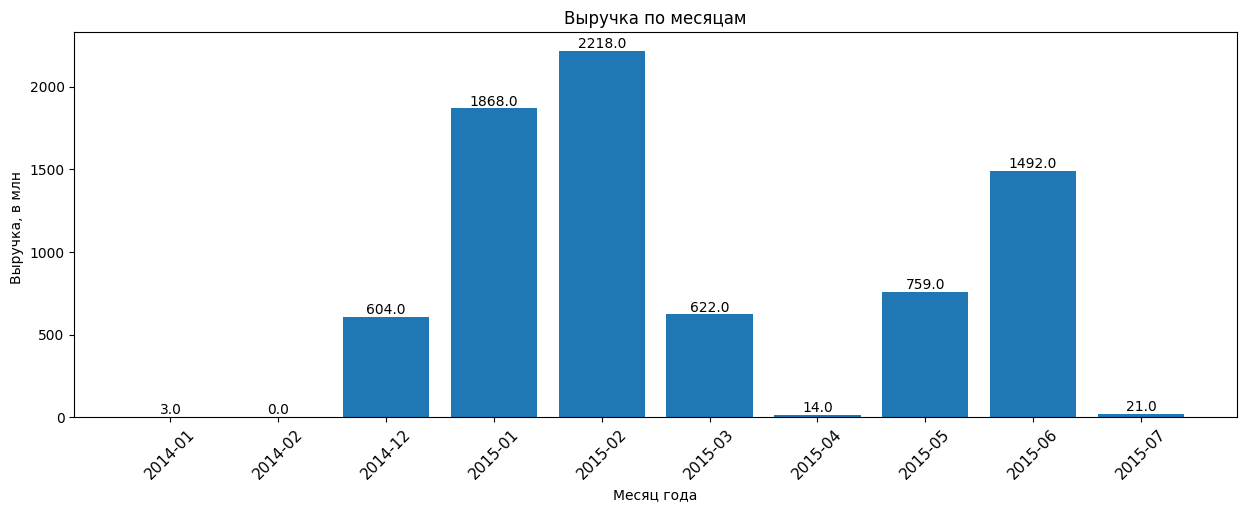

In [167]:
x = monthly_revenue['year_month']
y = monthly_revenue['sellingprice']

plt.figure(figsize=(15, 5))
plt.bar(x, y)
plt.xticks(rotation = 45, fontsize = 11)
plt.xlabel('Месяц года')
plt.ylabel('Выручка, в млн ')
plt.title('Выручка по месяцам')

for i in range (0, len(monthly_revenue)): 
    plt.annotate(monthly_revenue['sellingprice'].iloc[i], xy = (monthly_revenue['year_month'][i], monthly_revenue['sellingprice'].iloc[i]), va='bottom', ha='center')

plt.show()

In [181]:
df['full_name'] = df['make']+ ' ' + df['model'] + ' ' + df['trim'] 
most_popular_models = df.groupby('full_name')['saledate'].size().reset_index().sort_values(by = 'saledate', ascending=False)
most_popular_models.head(10).rename(columns = {'saledate':'sold_counts'}).reset_index()

,index,full_name,sold_counts
0,2492,Nissan Altima 2.5 S,11212
1,1244,Ford Fusion SE,8445
2,1206,Ford Focus SE,7920
3,1171,Ford F-150 XLT,6637
4,2491,Nissan Altima 2.5,6497
5,3090,Toyota Camry LE,6034
6,948,Dodge Grand Caravan SXT,4604
7,858,Chrysler Town and Country Touring,4559
8,1615,Hyundai Sonata GLS,4430
9,1573,Hyundai Elantra GLS,4422


In [193]:
total_revenue = df['sellingprice'].sum()
sales_by_seller = df.groupby('seller')['sellingprice'].sum().reset_index().sort_values(by = 'sellingprice', ascending=False)
sales_by_seller['share_in_revenue'] = round(sales_by_seller['sellingprice'] * 100 / total_revenue, 2)
sales_by_seller.rename(columns={'sellingprice':'sales'})
sales_by_seller.head(10)

,seller,sellingprice,share_in_revenue
5262,ford motor credit company llc,340960125.0,4.48
9292,nissan-infiniti lt,272104560.0,3.58
12746,the hertz corporation,250863168.0,3.30
9259,nissan infiniti lt,216158321.0,2.84
1536,avis corporation,203432330.0,2.67
4978,financial services remarketing (lease),174601400.0,2.30
8489,mercedes-benz financial services,152773950.0,2.01
4603,enterprise veh exchange/rental,126287886.0,1.66
11674,santander consumer,121287115.0,1.59
12610,tdaf remarketing,116104600.0,1.53
